In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import neighbors

In [2]:
data = pd.read_csv("cancer patient data sets.csv")
data.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [3]:
data.drop(["Patient Id" , "index"], axis = 1 , inplace = True)
data.head(10)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
5,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
6,52,2,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
7,28,2,3,1,4,3,2,3,4,3,...,3,2,2,4,2,2,3,4,3,Low
8,35,2,4,5,6,5,6,5,5,5,...,1,4,3,2,4,6,2,4,1,Medium
9,46,1,2,3,4,2,4,3,3,3,...,1,2,4,6,5,4,2,1,5,Medium


In [4]:
data.replace(to_replace= "Low", value= 0, inplace= True )
data.replace(to_replace= "Medium", value= 1, inplace= True )
data.replace(to_replace= "High", value= 2, inplace= True )

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

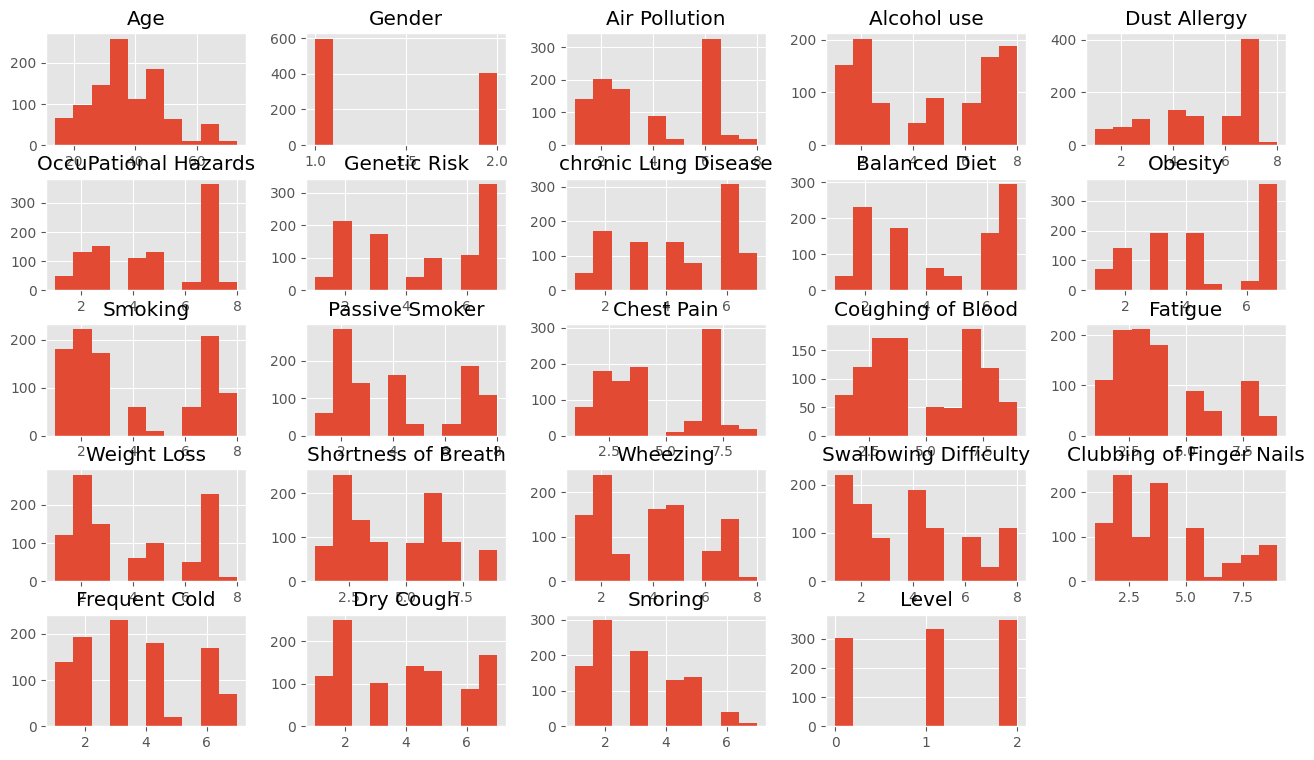

In [6]:
data.hist()
plt.show()

In [7]:
print(data.groupby('Level').size())

Level
0    303
1    332
2    365
dtype: int64


In [8]:
train, test = np.split(data.sample(frac=1), [int(0.75 * len(data))])
def pre(data):
    target = ["Level"]
    x = data.drop(target , axis = 1)
    y = data[target]
    
    return x , y
X_train , Y_train = pre(train)
X_test , Y_test = pre(test)

In [9]:
X_test

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
939,23,2,4,2,3,4,2,3,2,4,...,4,1,3,4,2,4,2,4,3,1
310,33,1,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4
39,45,2,1,2,4,5,6,5,5,4,...,2,3,8,7,3,8,3,2,3,1
174,45,2,1,2,3,4,2,4,3,3,...,4,4,1,2,4,6,5,4,2,5
995,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,33,1,6,7,7,7,7,6,7,7,...,7,4,4,5,6,5,5,4,6,5
634,46,2,1,6,7,5,3,2,6,2,...,2,3,3,7,7,4,8,7,7,5
780,26,2,8,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
10,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3


In [10]:
def trainC(X_train, Y_train, X_test, Y_test, NumN):
    knn = KNeighborsClassifier(NumN)
    knn.fit(X_train,Y_train.values.ravel())
    return (knn.score(X_train,Y_train)),r2_score(Y_test,knn.predict(X_test)),knn

In [11]:
sc1 = trainC(X_train, Y_train, X_test, Y_test, 1)
print('Acuracy of KNN training set: {:.2f}' ,sc1[0])
print('Acuracy of KNN test set: {:.2f}' ,sc1[1])

Acuracy of KNN training set: {:.2f} 1.0
Acuracy of KNN test set: {:.2f} 0.9939795304033715


In [12]:
def trainD (X_train, Y_train, X_test, Y_test, NumN):
    knn = KNeighborsRegressor(NumN)
    knn.fit(X_train,Y_train)
    return (knn.score(X_train,Y_train)),r2_score(Y_test,knn.predict(X_test)),knn

In [13]:
sc2 = trainD(X_train, Y_train, X_test, Y_test,1)
print('Acuracy of KNN training set: {:.2f}' ,sc2[0])
print('Acuracy of KNN test set: {:.2f}' ,sc2[1])

Acuracy of KNN training set: {:.2f} 1.0
Acuracy of KNN test set: {:.2f} 0.9939795304033715


In [14]:
def plot_train(k_m,k_M, trainX,X_train, Y_train, X_test, Y_test):
    k_range = range(k_m, k_M)
    scores = []
    scoresT = []
    for k in k_range:
        scores.append(trainX(X_train, Y_train, X_test, Y_test,k)[1])
        scoresT.append(trainX(X_train, Y_train, X_test, Y_test,k)[0])
    plt.figure()
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.scatter(k_range, scores)
    plt.scatter(k_range, scoresT)
    plt.xticks([0,5,10,15,20])

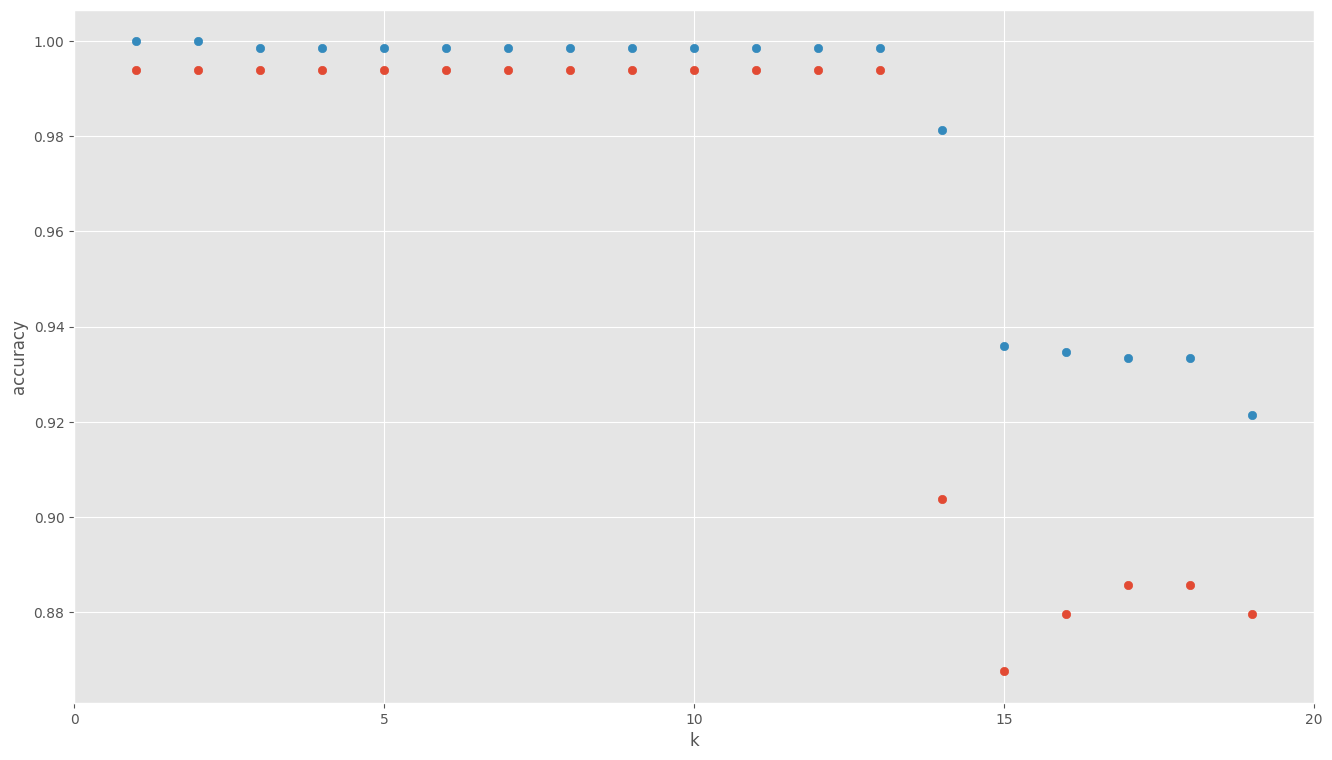

In [15]:
plot_train(1,20,trainC,X_train, Y_train, X_test, Y_test)

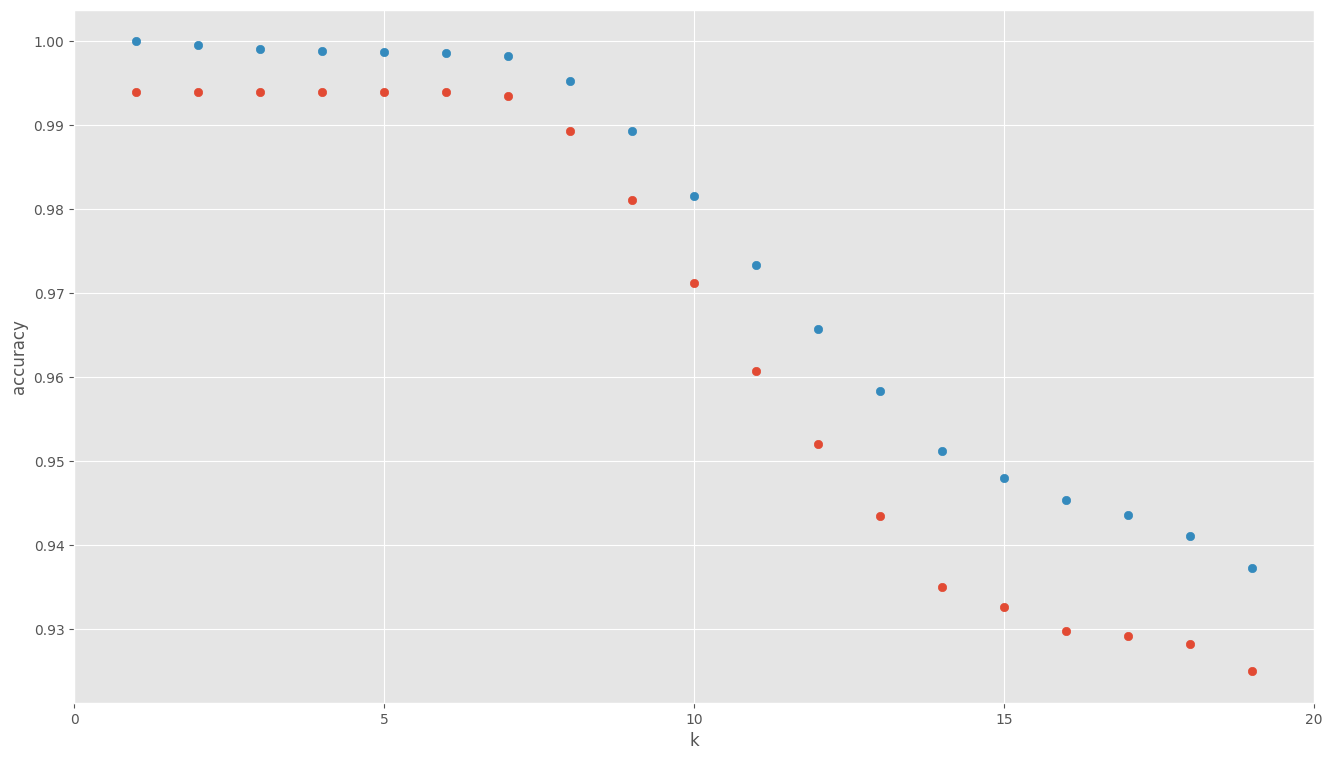

In [16]:
plot_train(1,20,trainD,X_train, Y_train, X_test, Y_test)

In [17]:
print(sc1[2].predict_proba([[50,1,6,7,5,3,3,7,2,7,9,9,2,0,4,2,4,4,3,2,5,5,5]]))
print(sc2[2].predict([[50,1,6,7,5,3,3,7,2,7,9,9,2,0,4,2,4,4,3,2,5,5,5]]))

[[1. 0. 0.]]
[[0.]]


c:\Users\mario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\mario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [18]:
pred = sc1[2].predict(X_test)
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

[[ 67   1   0]
 [  0  79   0]
 [  0   0 103]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.99      1.00      0.99        79
           2       1.00      1.00      1.00       103

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

